In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM,GRU

In [33]:
df = pd.read_csv(r'C:\Users\thesh\OneDrive\Máy tính\AI\data\cansim-0800020-eng-6674700030567901031.csv',
                skiprows=6,skipfooter=9,engine='python')
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [34]:
from pandas.tseries.offsets import MonthEnd

In [35]:
# Đổi stringsang Date 
# Rất quan trọng khi làm việc với time series

df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')
df.head()

,Unadjusted,Seasonally adjusted
Adjustments,,
1991-01-31,12588862,15026890
1991-02-28,12154321,15304585
1991-03-31,14337072,15413591
1991-04-30,15108570,15293409
1991-05-31,17225734,15676083


<AxesSubplot:xlabel='Adjustments'>

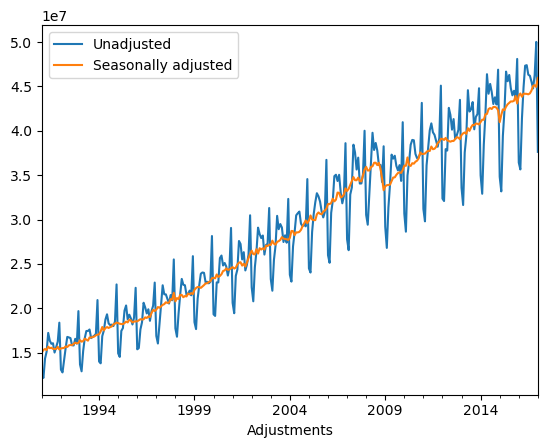

In [37]:
df.plot()

In [39]:
split_date = pd.Timestamp('01-01-2011')

In [42]:
train = df.loc[:split_date,['Unadjusted']]
test = df.loc[split_date:,['Unadjusted']]

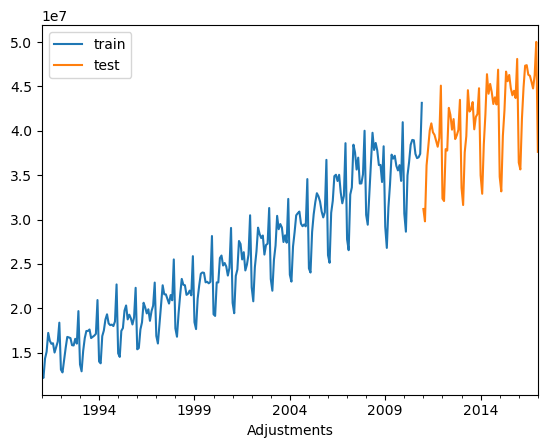

In [43]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train','test'])

### Scaling, tach train - test

In [44]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.fit_transform(test)

In [45]:
#Lay y dich lui di mot buoc thoi gian se la X
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [46]:
early_stop = EarlyStopping(monitor='loss',patience=2,verbose=1)

In [48]:
train_sc_df = pd.DataFrame(train_sc,columns=['Scaled'],index=train.index)
test_sc_df = pd.DataFrame(test_sc,columns=['Scaled'],index = test.index)
train_sc_df.head()

,Scaled
Adjustments,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


### Tạo các rolling window có kích thước 12 tháng

In [50]:
for s in range(1,13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

In [53]:
train_sc_df.head()

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.01402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.163628,0.095318,0.070426,0.00000,0.01402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Xoa cac hang khong co du lieu

In [ ]:
X_train = train_sc_df.dropna